In [1]:
from evwTools import *

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/DeltaT_v_Time_60hUnblinding_AllCalos_E_gt_1730.root")
f.ls()

TFile**		./data/DeltaT_v_Time_60hUnblinding_AllCalos_E_gt_1730.root	
 TFile*		./data/DeltaT_v_Time_60hUnblinding_AllCalos_E_gt_1730.root	
  KEY: TCanvas	c1;1	c1


In [3]:
c = f.Get("c1")

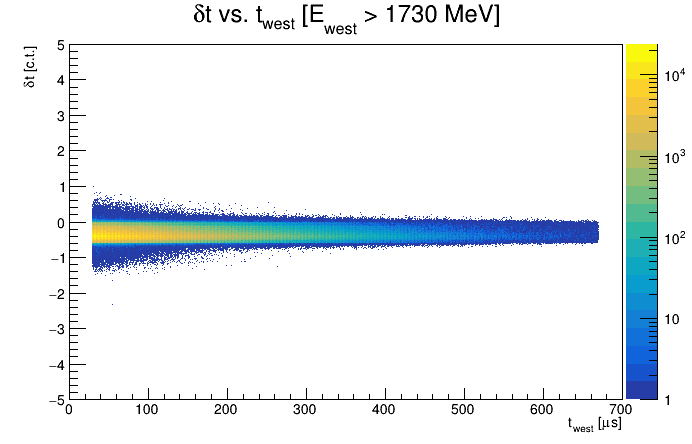

In [4]:
c.Draw()

In [5]:
print([x for x in c.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffcd525750>, <ROOT.TH2D object ("h") at 0x7fffcd52abb0>, <ROOT.TPaveText object ("title") at 0x7fffcd571520>]


In [6]:
h = c.GetPrimitive("h").Clone()
h.SetDirectory(0)

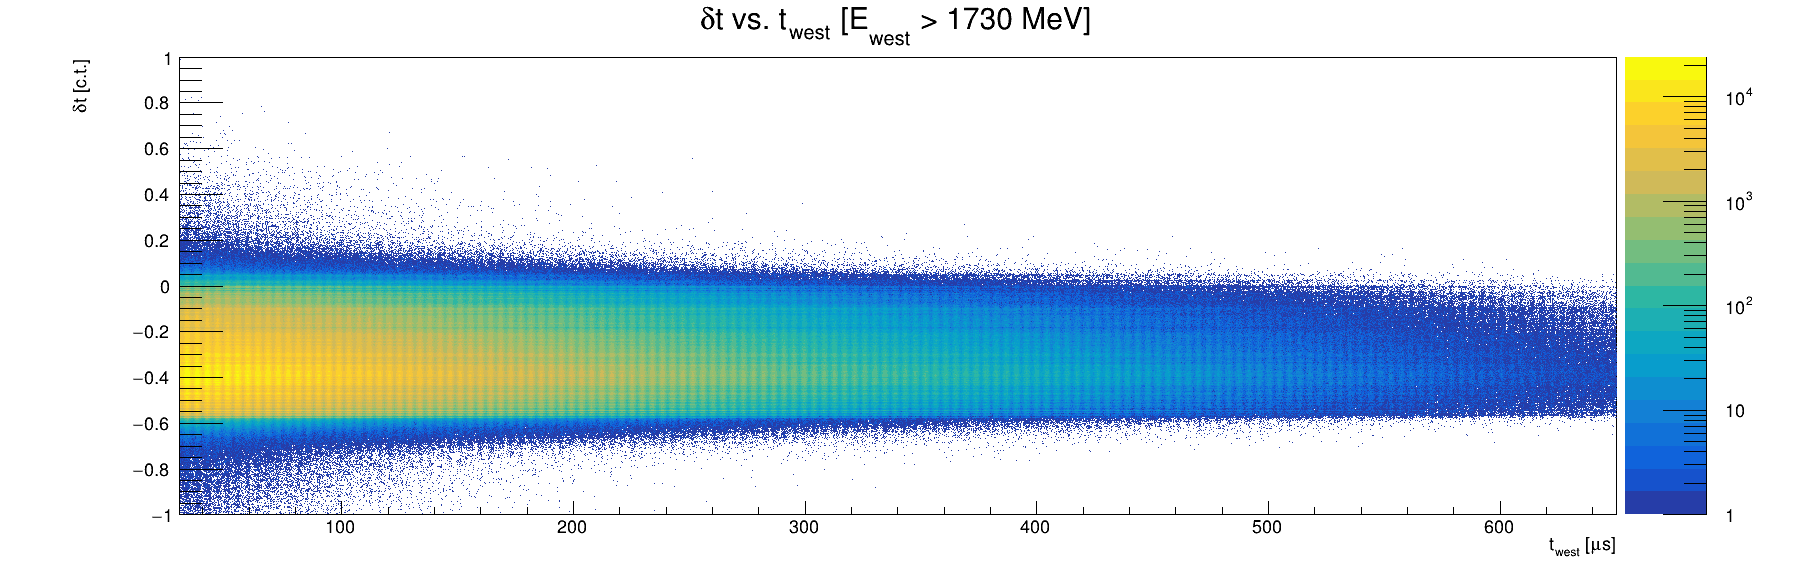

In [7]:
c = r.TCanvas("c","c",1800,600)
h.GetXaxis().SetRangeUser(30,650)
h.GetYaxis().SetRangeUser(-1,1)
h.Draw("colz")
c.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


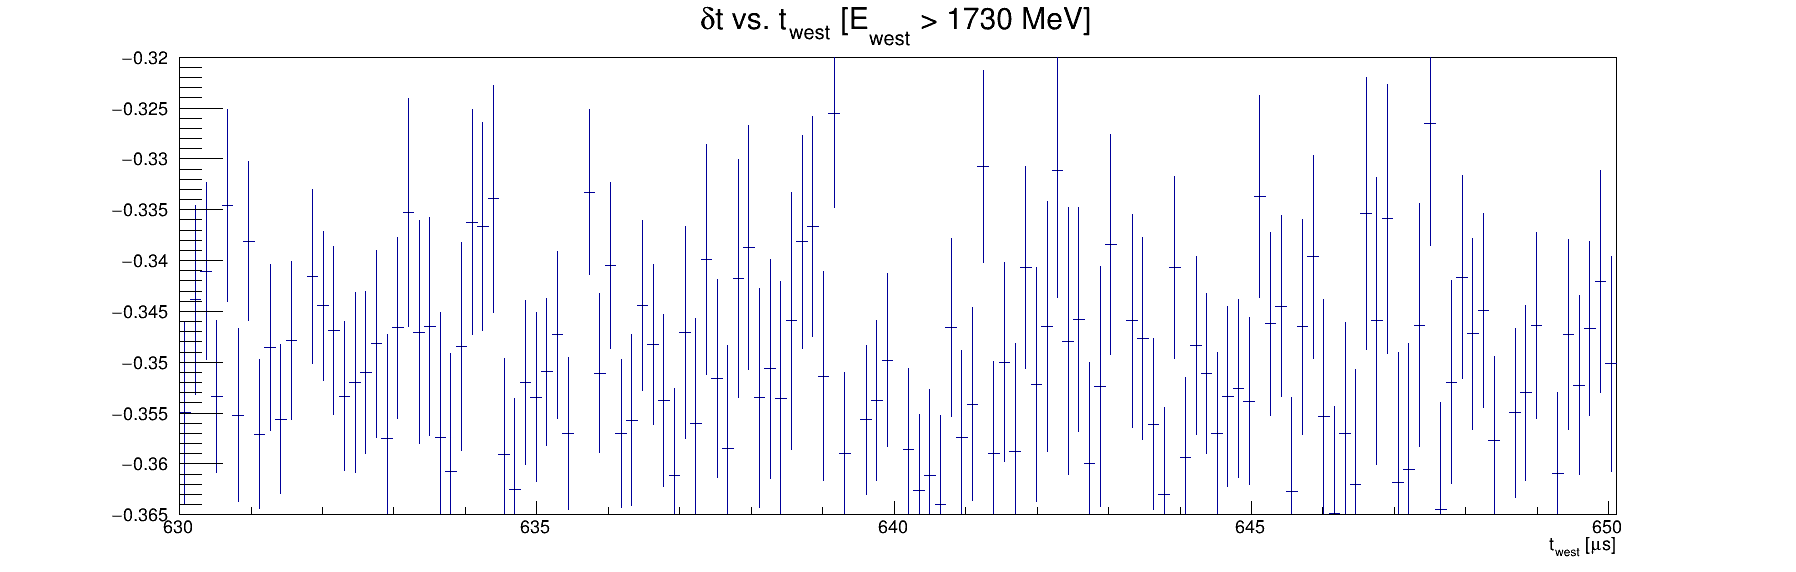

In [8]:
c = r.TCanvas("c","c",1800,600)
h2 = h.ProfileX().Clone()
h2.GetXaxis().SetRangeUser(630,650)
h2.GetYaxis().SetRangeUser(-0.365,-0.32)
h2.Draw("colz")
c.SetLogz()
c.Draw()

In [54]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def peak_fit_sine(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return ( (p[0]*r.TMath.Sin(omega*x[0] + p[2]))#*r.TMath.Exp(-x[0]/p[7]) 
            + p[6]*r.TMath.Sin(2*omega*x[0] + p[5])*r.TMath.Exp(-x[0]/p[7])  
            #+ p[7]*r.TMath.Sin(p[9]*omega*x[0] + p[8])
            + p[3] + p[4]*x[0]
           )

func1 = r.TF1("simplesine", peak_fit_sine, 30,650,8)
func1.SetParNames('A','R','#phi_{1}','+ C', 'm', '#phi_{2}','A_{2}', '#tau_{2}' )
func1.SetParameters(0.004952,0,0.6,-0.35,0,0,0.00004,0.000001,100,4)
#func1.SetParLimits(5,1,10**15) #avoid divide by zero errors
#func1.SetParLimits(7,1,10**15) #avoid divide by zero errors
func1.SetLineColor(2)
func1.SetNpx(5000)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


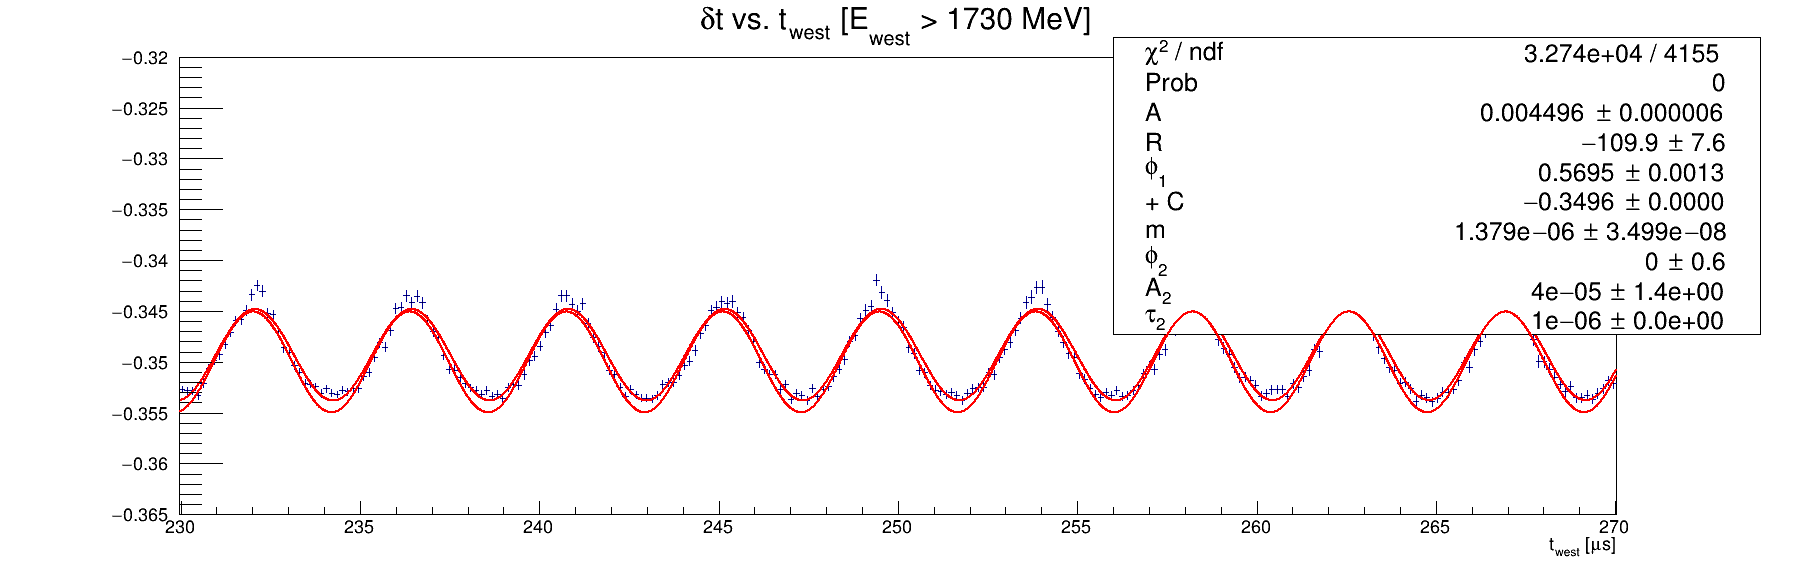

In [55]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
func1.Draw("same")
c.SetLogz()
c.Draw()

Starting Fit 1
Starting Fit 2
 FCN=33689.5 FROM MIGRAD    STATUS=FAILED        532 CALLS         533 TOTAL
                     EDM=-nan    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            4.62375e-03   5.72843e-06          -nan   4.81109e+06
   2  R           -1.03131e+02   7.40015e+00          -nan   1.51290e-01
   3  #phi_{1}     5.79676e-01   1.24490e-03          -nan   8.07882e+03
   4  + C         -3.49659e-01   4.04305e-06          -nan  -2.42762e+06
   5  m            2.43604e-06   3.49855e-08          -nan   1.06346e+09
   6  #phi_{2}     0.00000e+00   4.24264e-01          -nan   0.00000e+00
   7  A_{2}        4.00000e-05   1.41421e+00          -nan   0.00000e+00
   8  #tau_{2}     1.00000e-06   0.00000e+00          -nan          -inf
 FCN=32736.9 FROM MIGRAD    STATUS=FAILED        522 CALLS         523 TOTAL
  

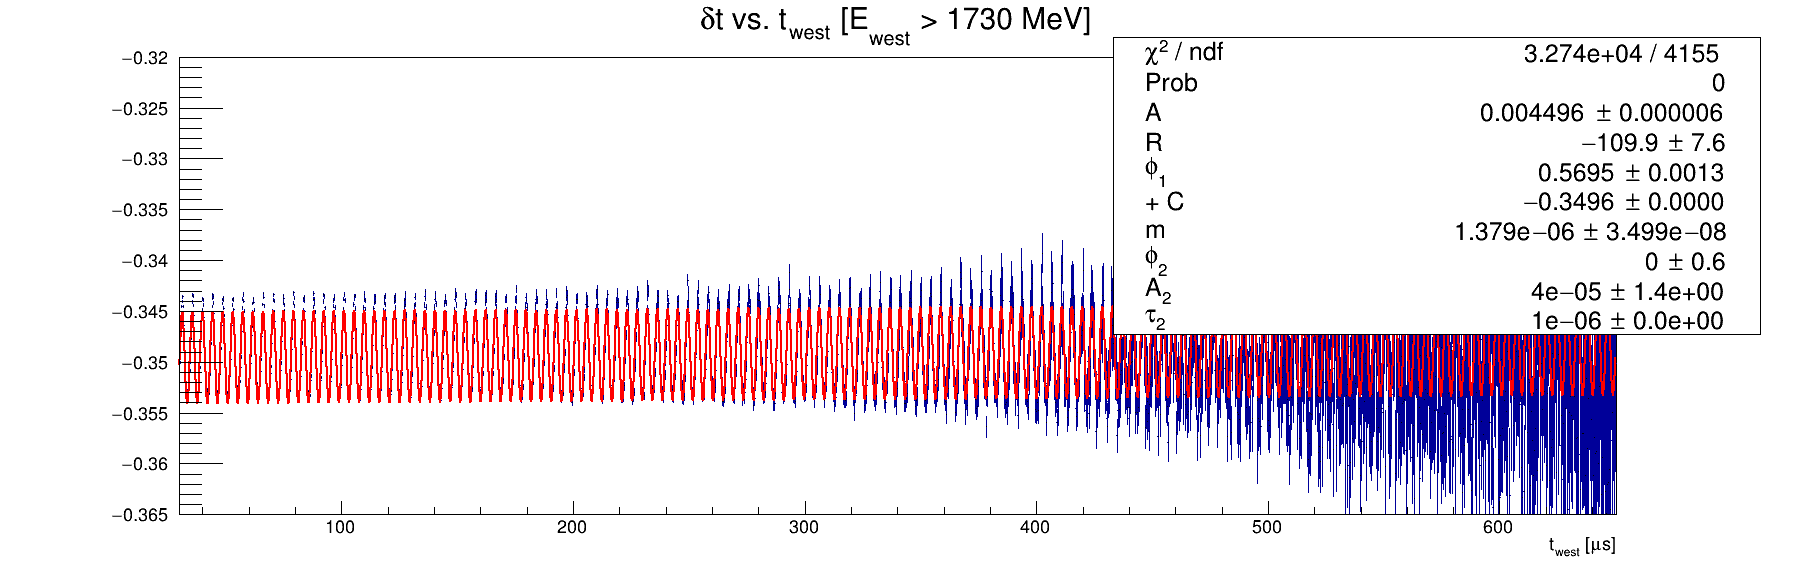

In [56]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(30,700)
for i in range(2):
    print("Starting Fit", i+1)
    h2.Fit("simplesine","REMB")
c.Draw()

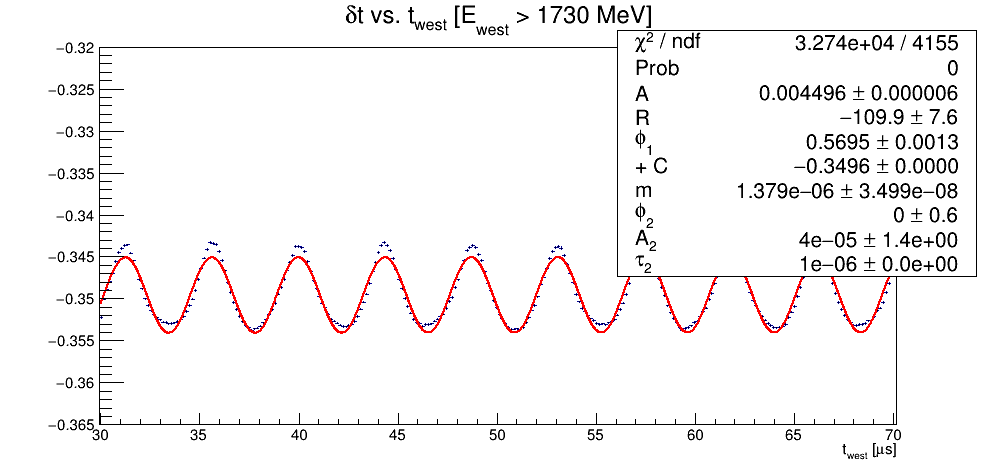

In [57]:
c = r.TCanvas("c","c",1000,500)
h2.GetXaxis().SetRangeUser(30,70)
h2.Draw()
c.Draw()

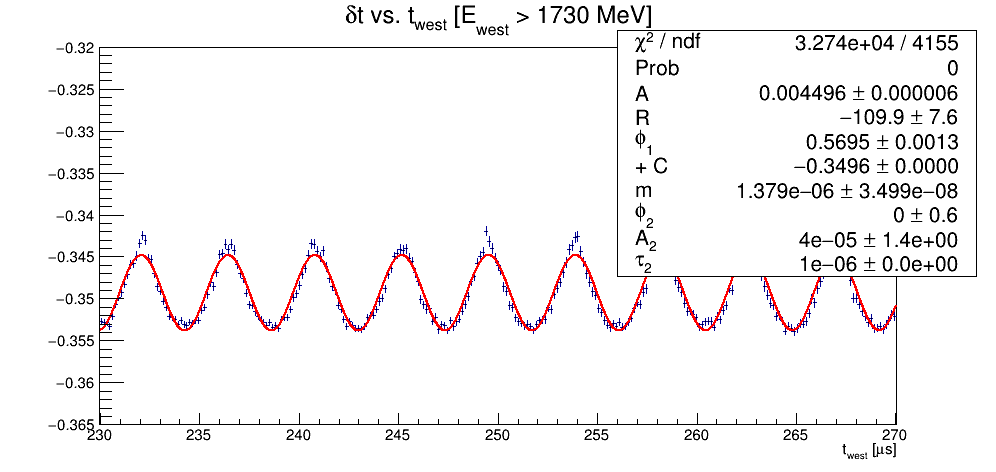

In [58]:
c = r.TCanvas("c","c",1000,500)
h2.GetXaxis().SetRangeUser(230,270)
h2.Draw()
c.Draw()

Creating new Ratio Plot


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


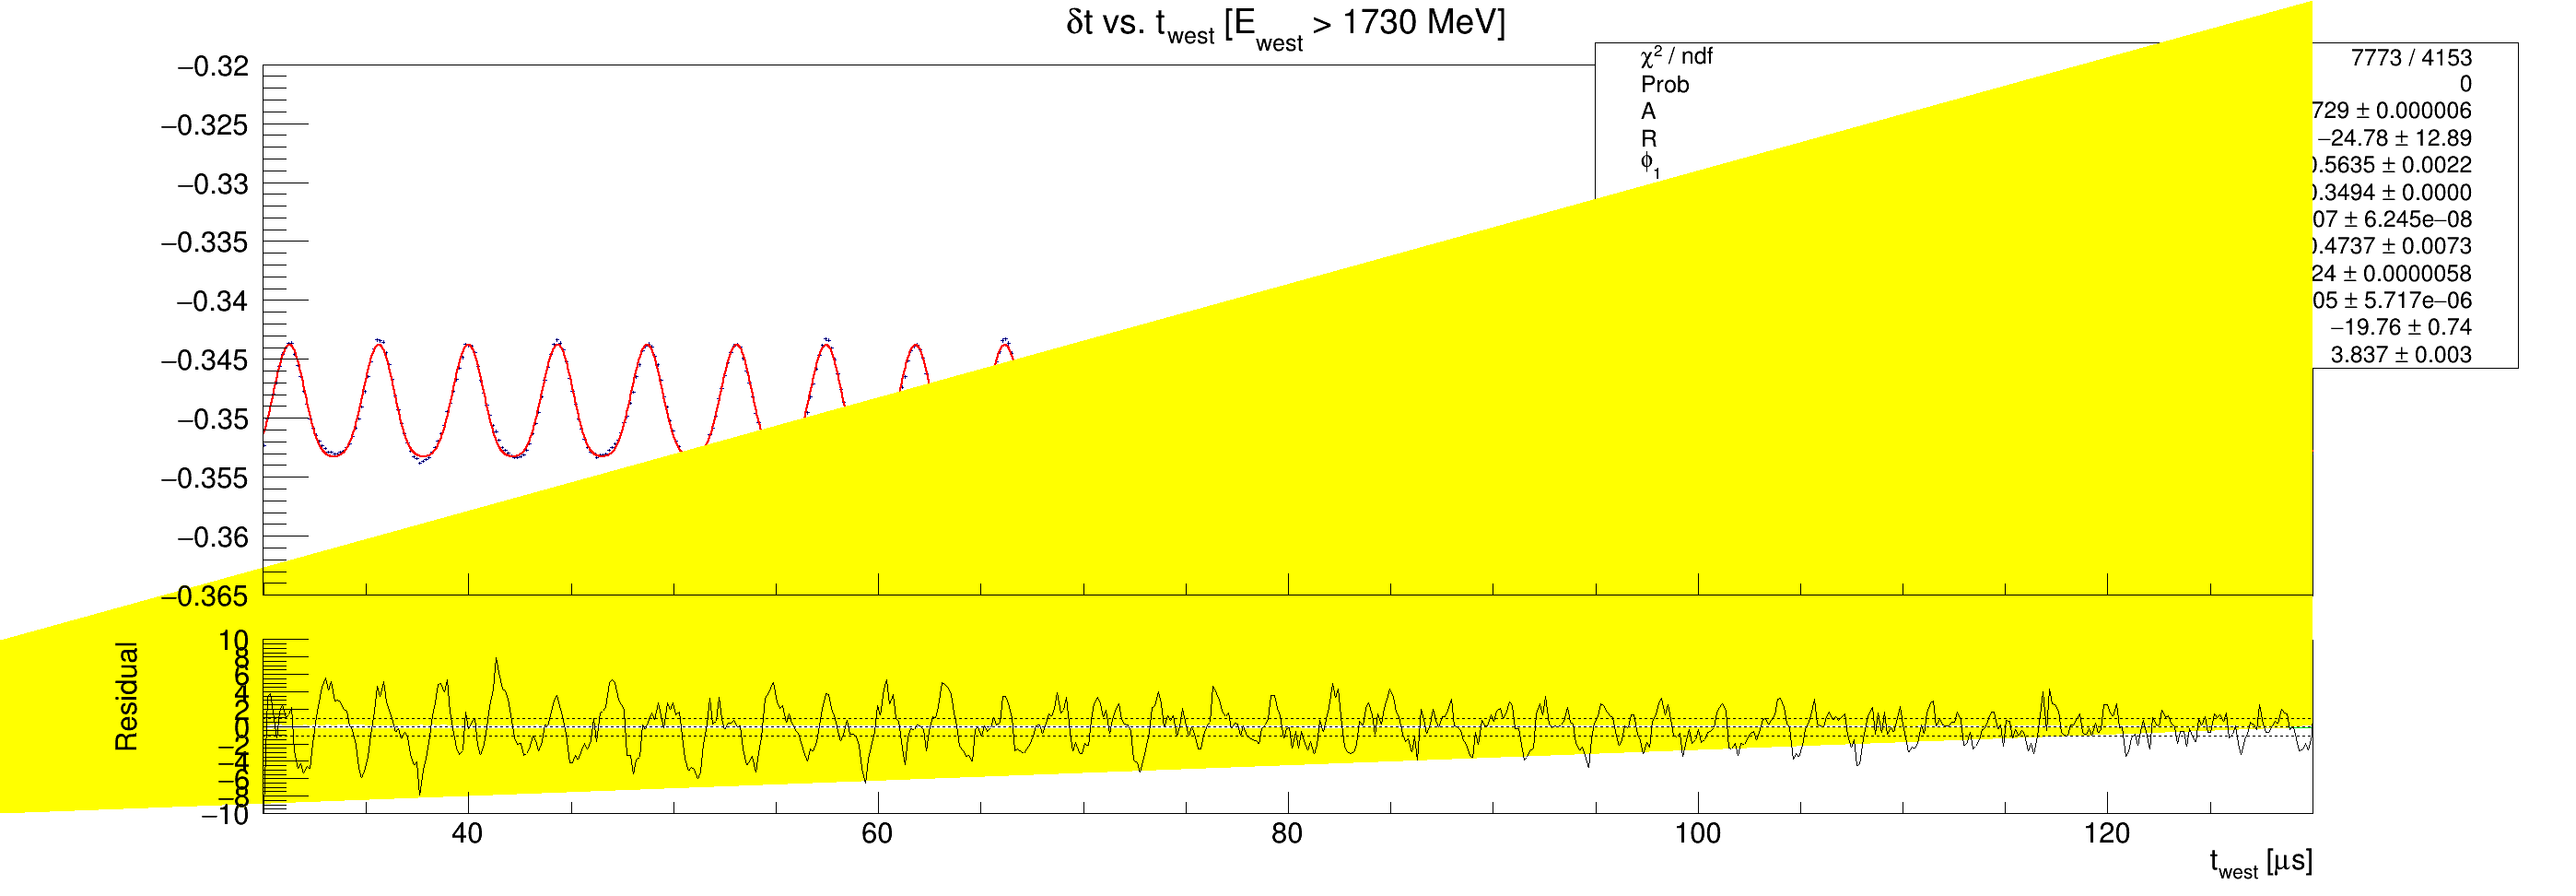

In [13]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas("c","c",2800,1000)
h2.Draw()
h2.GetXaxis().SetRangeUser(30,130)

c3.Draw()

try:
    rp1.Delete()
except:
    print("Creating new Ratio Plot")

try:
    rp1 = r.TRatioPlot(h2)
    rp1.Draw()
    rp1.GetLowerRefYaxis().SetTitle("Residual")
    rp1.GetLowerRefYaxis().SetRangeUser(-10,10)
except:
    print("ERROR: Could not create TRatioPlot. Probably too many fit functions on one histogram.")

c3.Update()
c3.Draw()

---

### fft of main plot

4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


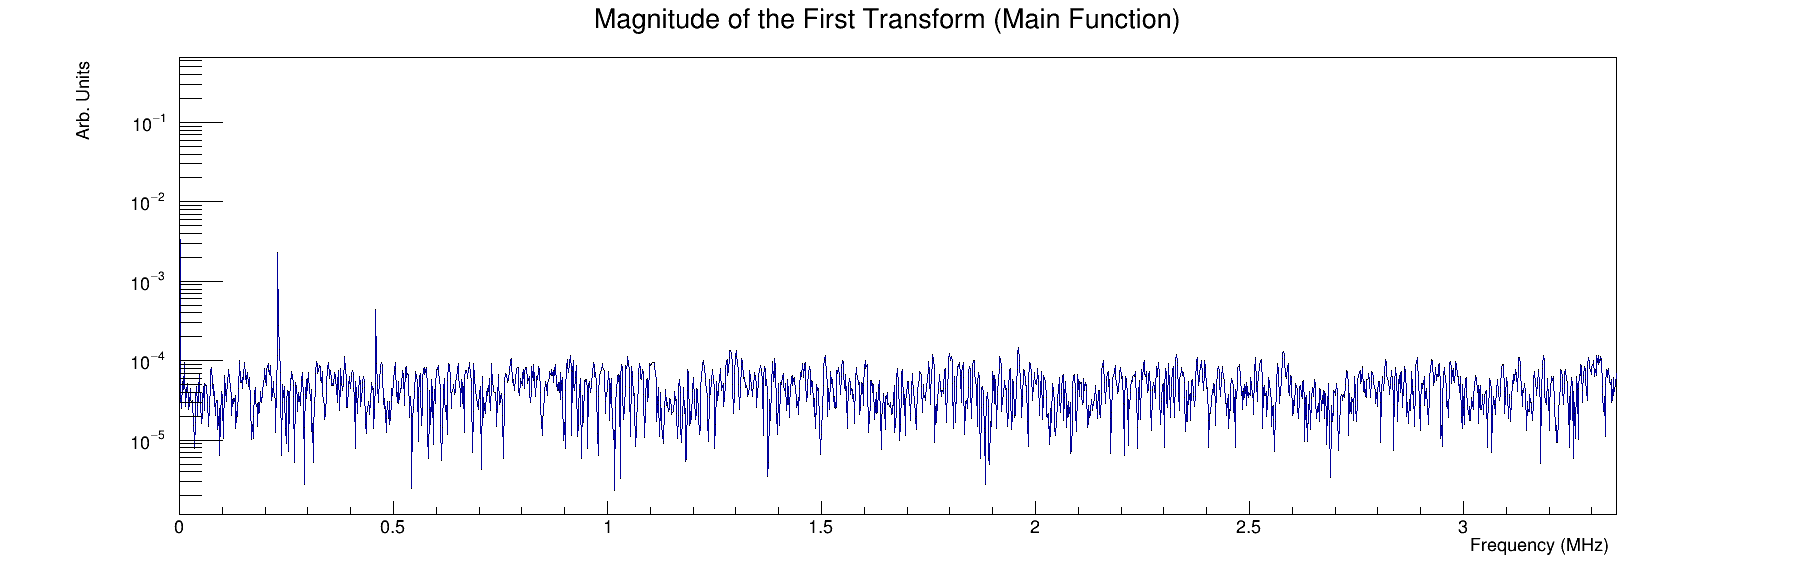

In [14]:
c3 = r.TCanvas("c","c",1800,600)
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = h2.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (Main Function)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas("c","c",1800,600)
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = h2.GetSize() -2
minBinCenter = h2.GetXaxis().GetBinCenter(0)
maxBinCenter = h2.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = h2.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

c2.SetLogy()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


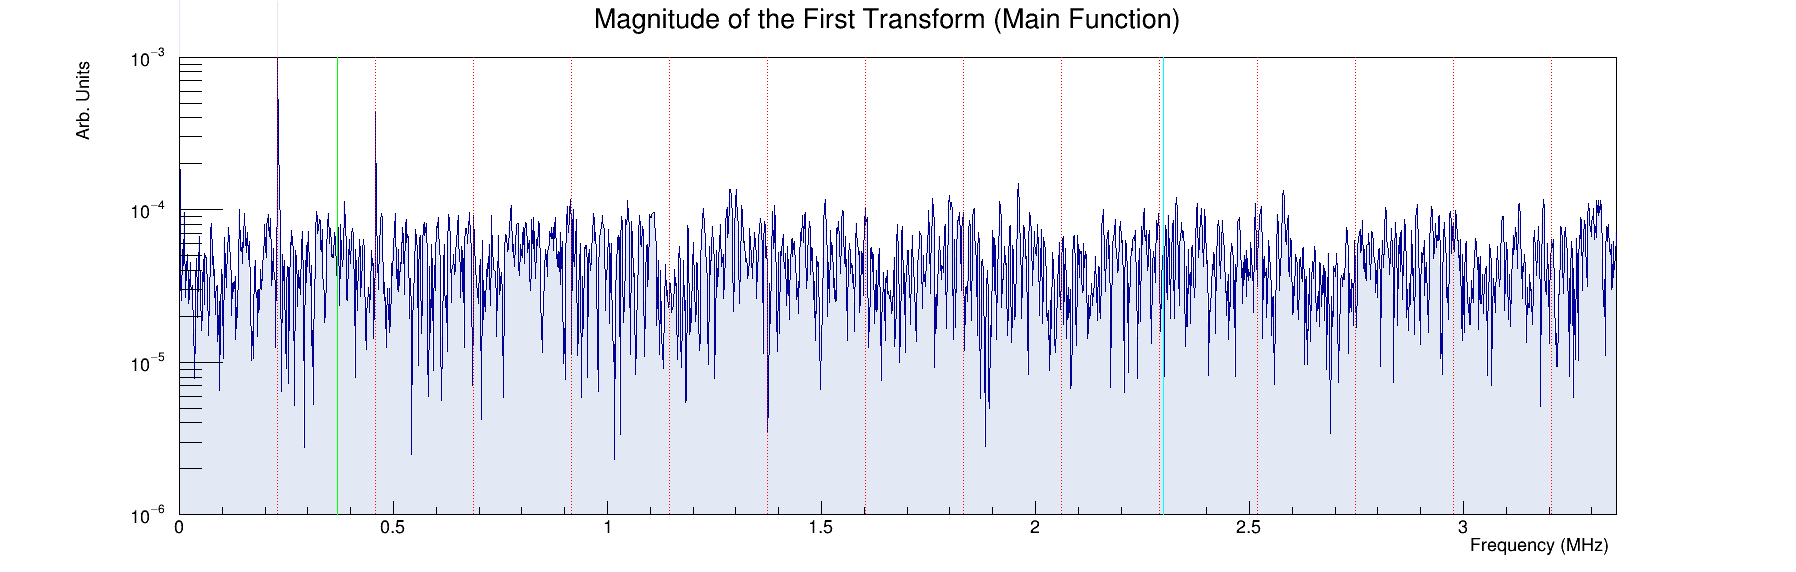

In [15]:
c2 = r.TCanvas("c","c",1800,600)
c2.cd()

ymin = 0.000001
ymax = 0.001
hxform.GetYaxis().SetRangeUser(ymin,ymax)

hxform.SetFillColorAlpha(38,0.2)
hxform.Draw("HIST P0 L")

cboline = r.TLine(0.37,ymin,0.37,ymax)
cboline.SetLineColor(3)
cboline.Draw("SAME")

vwline = r.TLine(2.3,ymin,2.3,ymax)
vwline.SetLineColor(7)
vwline.Draw("SAME")

oalines = []
for i in range(1,15):
    oalinei = r.TLine(0.229*i,ymin,0.229*i,ymax)
    oalinei.SetLineColor(2)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oalines.append(oalinei)
'''
oa_cbo_lines = []
oa_cbo_lines_pos = []
oa_cbo_lines_pos_2 = []
oa_cbo_lines_neg = []
oa_cbo_lines_allCombos = []
ttvec = []
for i in range(1,15):
    oalinei = r.TLine(0.37*i,0.000001,0.37*i,0.001)
    oalinei.SetLineColor(3)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oa_cbo_lines.append(oalinei)
for i in range(1,15):
    oalinei = r.TLine(0.229*i+0.37,0.000001,0.229*i+0.37,0.001)
    oalinei.SetLineColor(6)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oa_cbo_lines_pos.append(oalinei)
for i in range(1,15):
    oalinei = r.TLine(0.229+0.37*i,0.000001,0.229+0.37*i,0.001)
    oalinei.SetLineColor(12)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oa_cbo_lines_pos_2.append(oalinei)
for i in range(2,15):
    oalinei = r.TLine(0.229*i-0.37,0.000001,0.229*i-0.37,0.001)
    oalinei.SetLineColor(6)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oa_cbo_lines_neg.append(oalinei)
for i in range(-10,10):
    for j in range(-10,10):
        for k in range(0,1):
            if(0.229*i+0.37*j+2.3*k < 0):
                continue
            oalinei = r.TLine(0.229*i+0.37*j+2.3*k,0.000001,0.229*i+0.37*j+2.3*k,0.001)
            oalinei.SetLineColor(1)
            oalinei.SetLineStyle(3)
            oalinei.Draw()
            oa_cbo_lines_allCombos.append(oalinei)

            tt = r.TText(.229*i+0.37*j+2.3*k,0.0005,"("+str(i)+","+str(j)+","+str(k)+")")
            ttvec.append(tt)
            tt.Draw()
'''
#hxform.GetYaxis().SetRangeUser(0,1.4)
c2.SetLogy()
#c2.SetGrid()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

In [16]:
mainfuncfft = hxform.Clone("mainfuncfft")

4164
3828 [(30.010638297872337, -0.0010193340985866217), (30.159574468085104, 0.00029949142163304687), (30.308510638297868, 0.0003456962929399565), (30.457446808510635, 0.0001649346085950132), (30.6063829787234, -0.00013386597403020062)]
3828 569.9787234042552 29.93618966628871 599.9149130705439
0.1488972631672558 0.0017544514539549819
13.43208033147934 6.71604016573967


Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


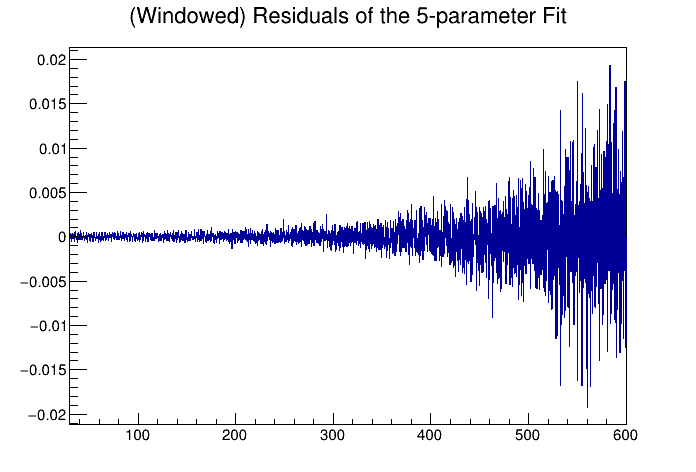

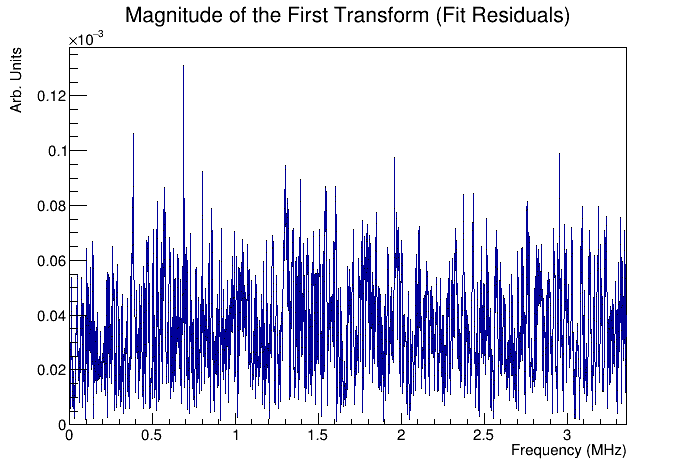

In [17]:
c3 = r.TCanvas()
residuals5param = h2.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
residVec = []
for i in range(nBins):
    binCenterX = h2.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30 and binCenterX < 600):
        residVec.append( (binCenterX, h2.GetBinContent(i) - func1.Eval(binCenterX) ) )
        residuals5param.SetBinContent(i, h2.GetBinContent(i) - func1.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
residuals5param.Delete()
residuals5param = htest
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

#apply a windows function to try to get rid of the imaginary peaks
welchVec = []
for i in range(nBins):
    unwindowed = residuals5param.GetBinContent(i)
    welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
    welchVec.append(welch)
    residuals5param.SetBinContent(i, unwindowed *  welch)
    
residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,700)
residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
c3.Draw()    
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (Fit Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

#c2.SetLogy()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

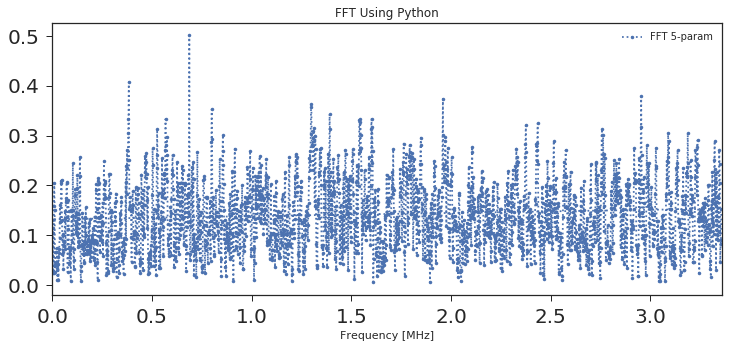

In [18]:
ding = np.fft.fft(np.array(bins))

n = len(bins)
d = (centers[1] - centers[0])*math.pow(10.0,-6)

freq = np.fft.fftfreq(n, d)


fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/(10**6) for x in freq],np.abs(ding),'.:',label='FFT 5-param')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz]")
plt.xlim(0,6.7157787731503555 / 2)# *10.**6)
plt.legend()
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./resid.root has been created


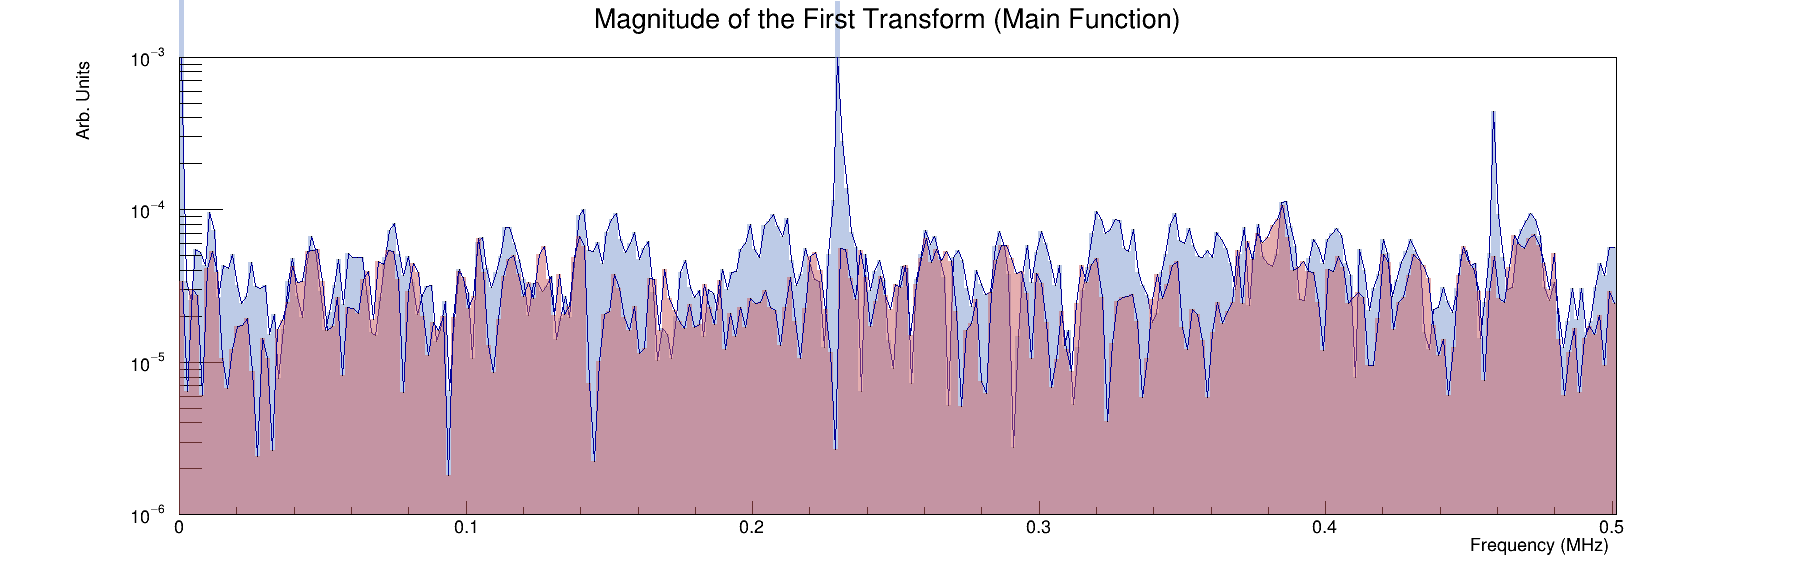

In [19]:
c2 = r.TCanvas("c","c",1800,600)
c2.cd()

ymin = 0.000001
ymax = 0.001
mainfuncfft.GetYaxis().SetRangeUser(ymin,ymax)
mainfuncfft.GetXaxis().SetRangeUser(0,0.5)

mainfuncfft.SetFillColorAlpha(38,0.5)
residuals5paramXform.SetFillColorAlpha(46,0.5)


mainfuncfft.Draw("HIST P0 L")
residuals5paramXform.Draw("hist P0 L same")


#hxform.GetYaxis().SetRangeUser(0,1.4)
c2.SetLogy()
#c2.SetGrid()
c2.Draw()
c2.Print("./resid.root")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

In [43]:
def peak_fit_sine_2(x, p):
    #R = p[1]
    #omega = getBlinded.paramToFreq(R)
    return ( (p[0]*r.TMath.Sin(p[1]*x[0] + p[2]))#*r.TMath.Exp(-x[0]/p[7]) 
            #+ p[6]*r.TMath.Sin(2*omega*x[0] + p[5])#*r.TMath.Exp(-x[0]/p[7])  
            + p[3] #+ p[4]*x[0]
            + (p[4]*r.TMath.Sin(p[5]*x[0] + p[6]))
           )

func2 = r.TF1("func2", peak_fit_sine_2, 30,70,7)
func2.SetParNames('A','#omega','#phi_{1}','+ C', 'A_{vw}', '#omega_{vw}')
func2.SetParameters(0.0005,0.227,0.6,0,0,0,0.00004,100000000)
#func1.SetParLimits(5,1,10**15) #avoid divide by zero errors
func2.SetParLimits(7,1,10**15) #avoid divide by zero errors
func2.SetLineColor(3)
func2.SetNpx(5000)

In [44]:
print(func2)

<ROOT.TF1 object ("func2") at 0x7fffce56d420>


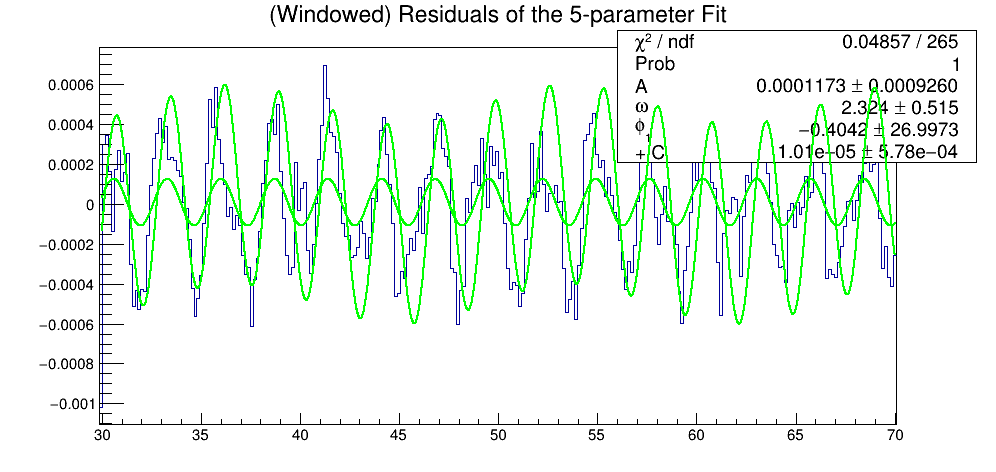

In [46]:
c = r.TCanvas("c","c",1000,500)
residuals5param.GetXaxis().SetRangeUser(30,70)

func2.SetParameters(0.0001,0.37,0.6,0,0.0005,2.3,0)
residuals5param.Draw()
func2.Draw("SAME")
c.Draw()

 FCN=0.0477614 FROM MINOS     STATUS=FAILURE      1517 CALLS        9629 TOTAL
                     EDM=5.43673e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            2.32415e-05   8.17337e-04   1.03711e-06   2.09283e+00
   2  #omega       4.14716e-01   3.77331e+00   9.92272e-05  -9.40765e-04
   3  #phi_{1}     4.76051e-01   2.24051e+02  -8.47585e-03  -2.15596e-05
   4  + C          8.36951e-06   6.03913e-04   7.24707e-07   1.68861e-01
   5  m            1.20976e-04   9.33024e-04   3.07263e-06  -2.24075e+00
   6  #phi_{2}     2.32042e+00   5.48787e-01  -3.53003e-03  -1.61046e-03
   7  A_{2}       -2.25461e-01   2.89788e+01   2.89788e+01   2.33046e-05
 FCN=0.0477613 FROM MINOS     STATUS=FAILURE      1655 CALLS       11980 TOTAL
                     EDM=2.35771e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER            

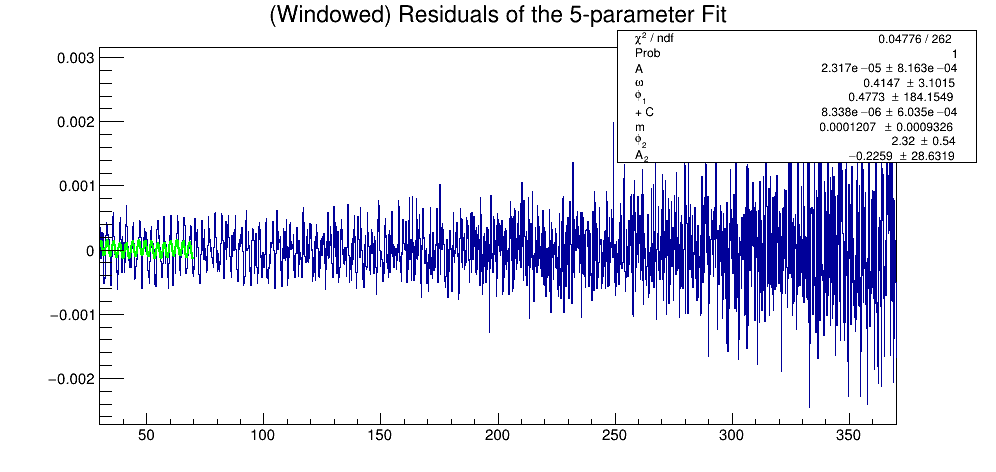

In [47]:
c = r.TCanvas("c","c",1000,500)
residuals5param.GetXaxis().SetRangeUser(30,370)
residuals5param.Draw()
for i in range(2):
    print("starting fit", i+1)
    residuals5param.Fit("func2","REMB")
c.Draw()

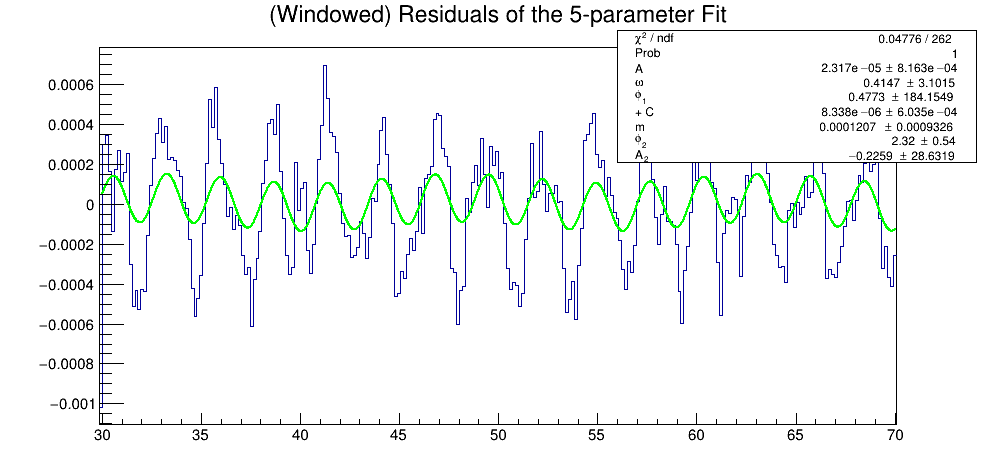

In [48]:
c = r.TCanvas("c","c",1000,500)
residuals5param.GetXaxis().SetRangeUser(30,70)

residuals5param.Draw()
c.Draw()